In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Obter base de dados de imigração para o Canadá
df = pd.read_csv('../dados/canadian_immegration_data.csv')

# Transformar a coluna 'Country' em índice no data frame
df.set_index('Country', inplace=True)

# Criar lista com anos de 1980 a 2013 em forma de string
anos = list(map(str,range(1980, 2014))) 

# Obter os dados de imigração do Brasil de 1980 a 2013
brasil = df.loc['Brazil', anos]

# Criar Dictionary com os dados de imigração do Brasil
brasil_dict = {
    'ano': brasil.index.tolist(),
    'imigracao': brasil.values.tolist()
}

# Criar DataFrame com os dados de imigração do Brasil
dados_brasil = pd.DataFrame(brasil_dict)
dados_brasil.head()

,ano,imigracao
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


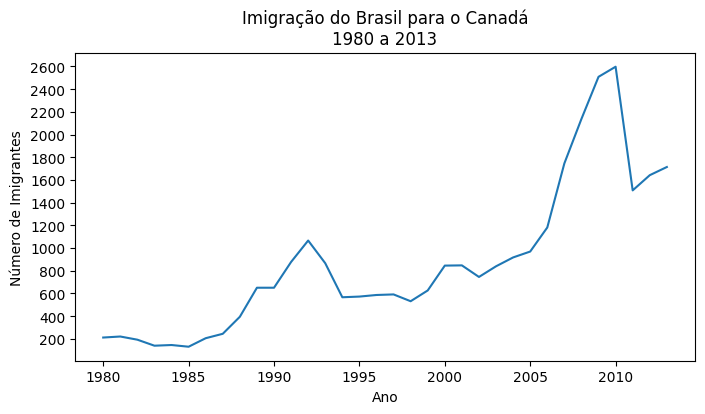

In [16]:
figure, axes = plt.subplots(figsize=(8, 4))

axes.plot(dados_brasil['ano'], dados_brasil['imigracao'])
axes.set_title('Imigração do Brasil para o Canadá\n1980 a 2013')

axes.xaxis.set_major_locator(plt.MultipleLocator(5)) # Mostrar rótulos do eixo X a cada 5 unidades
axes.set_xlabel('Ano')

axes.yaxis.set_major_locator(plt.MultipleLocator(200)) # Mostrar rótilos do eixo Y a cada 100 unidades
axes.set_ylabel('Número de Imigrantes')

plt.show()

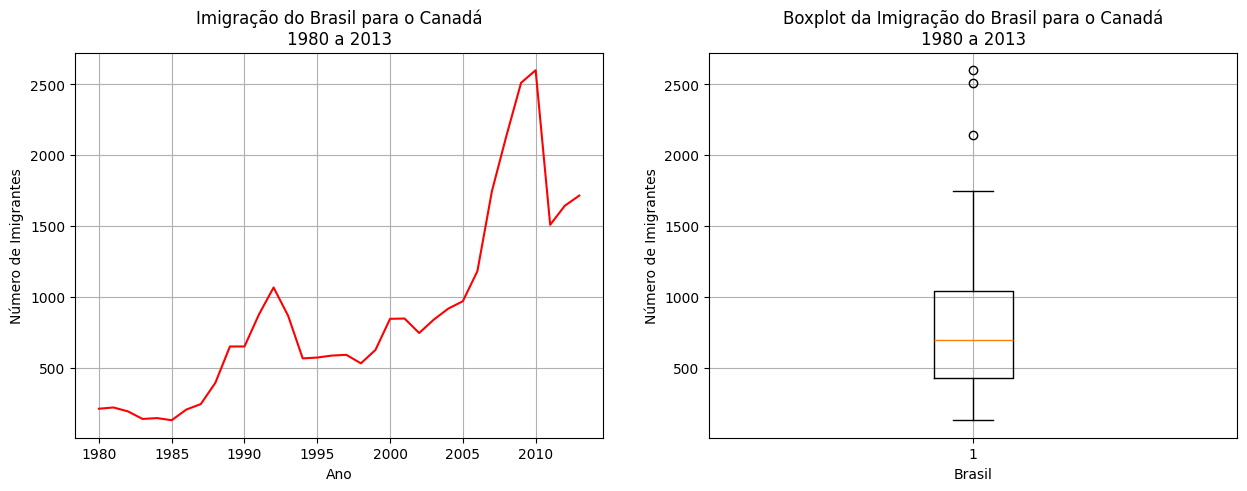

In [44]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Criar gráfico de linhas sobre as imigrações do Brasil para o Canadá entre 1980 e 2013
axes[0].plot(dados_brasil['ano'], dados_brasil['imigracao'], color='red')
axes[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Número de Imigrantes')
axes[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axes[0].grid(True)

# Criar gráfico boxplot sobre as imigrações do Brasil para o Canadá entre 1980 e 2013
axes[1].boxplot(dados_brasil['imigracao'])
axes[1].set_title('Boxplot da Imigração do Brasil para o Canadá\n1980 a 2013')
axes[1].set_ylabel('Número de Imigrantes')
axes[1].set_xlabel('Brasil')
axes[1].grid(True)

plt.show()

In [46]:
# Verificando as informações exibidas no boxplot
#   Linha inferior da caixa: 25% dos dados (428.250000)
#   Linha no meio da caixa: 50% dos dados (697.500000)
#   Linha superior da caixa: 75% dos dados (1041.750000)
#   Pontos fora da caixa: Outliers
dados_brasil.describe()

,imigracao
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


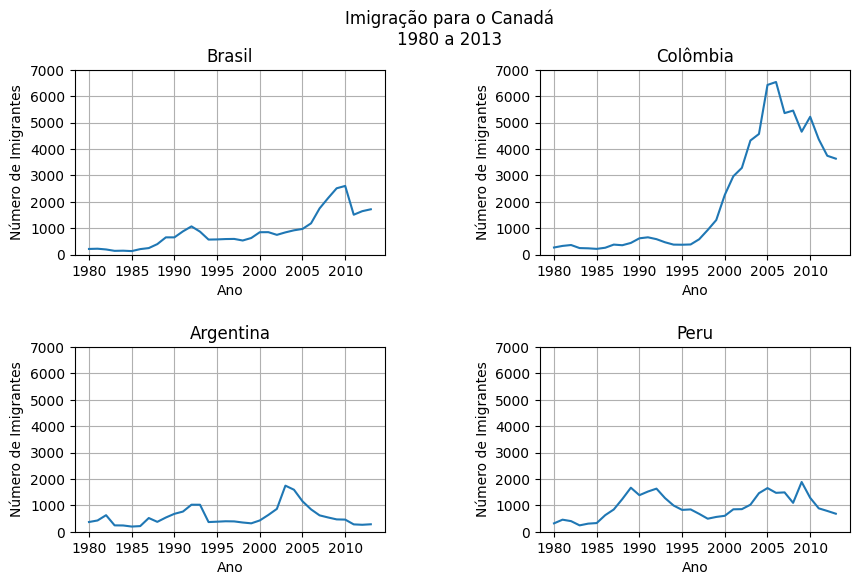

In [76]:
# Obter dados para os países Brasil, Colômbia, Argentina e Peru a partir do índice do data frame
df_brasil = df.loc['Brazil', anos]
df_colombia = df.loc['Colombia', anos]
df_argentina = df.loc['Argentina', anos]
df_peru = df.loc['Peru', anos]

figures, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
figures.subplots_adjust(hspace=0.5, wspace=0.5) # Ajustar espaçamento entre os gráficos (horizontal e vertical)
figures.suptitle('Imigração para o Canadá\n1980 a 2013') # Título geral para o conjunto de gráficos

axes[0, 0].plot(df_brasil)
axes[0, 0].set_title('Brasil')
axes[0, 0].set_xlabel('Ano')

axes[0, 1].plot(df_colombia)
axes[0, 1].set_title('Colômbia')

axes[1, 0].plot(df_argentina)
axes[1, 0].set_title('Argentina')

axes[1, 1].plot(df_peru)
axes[1, 1].set_title('Peru')

for ax in axes.flat:
    ax.set(xlabel='Ano', ylabel='Número de Imigrantes')
    ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Mostrar rótulos do eixo X a cada 5 unidades
    ax.yaxis.set_major_locator(plt.MultipleLocator(1000)) # Mostrar rótulos do eixo Y a cada 1000 unidades
    ax.grid(True)

for ax in axes.ravel():
    ax.set_ylim(0, 7000) # Definir escala do exico Y para todos os gráficos entre 0 e 7000

plt.show()